In [1]:
import sys, os
sys.path.append("/home/ssawmya-local/FM_work/SmartEM/smartem/segmentation")

import importlib
import UNet_

# reload tools
import tools
importlib.reload(tools)
from tools import get_error_map, get_error_GT
import segmenter
import torch
import h5py
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
device = torch.device("cuda:4" if torch.cuda.is_available() else "cpu")

EM2err = True
model_weights = '/home/ssawmya-local/FM_work/smartem_support/fusedem2mb_segformer/unet_50_1.29e-01.pth'
net = UNet_.UNet(n_channels=1,n_classes=2)
Iseg = segmenter.Segmenter(model_weights, device=device)
Iseg.set_model(model_class=net)

dwell_times = ['100', '1000', '1200', '125', '150', '200', '25', '300', '400', '50', '500', '600', '75', '800']
dwell_times = ['50', '1200']
dwell_times = [int(d) for d in dwell_times]
dwell_times = np.sort(dwell_times)
# dwell_times = [50]
in_dataset_h5 = "/storage2/projects/smartEM/em-vis/smartem-data-train.hdf5"
# Make predictions and compute errors
with h5py.File(in_dataset_h5, 'r') as h5:
    regs=h5.attrs["regs"]
    data_to_save = {}
    out_regs = []

    # dwts.sort()
    # slowest_dwt = dwts[-1]
    slowest_dwt = dwell_times[-1]
    hdt_im, _ = h5[regs[0]+"/"+str(slowest_dwt)+"/im"], h5[regs[0]+"/"+str(slowest_dwt)+"/mask"]
    _, hdt_mb_probs = Iseg.get_membranes(hdt_im, get_probs=True)
    # print(np.unique(hdt_mb_probs))
    # make hdt_mb_probs uint8
    hdt_mb_probs = (hdt_mb_probs*255).astype(np.uint8)
    # print(slowest_dwt)

    for reg in tqdm(regs, desc="generating membrane predictions..."):
        for dwt in dwell_times:
            if dwt == '1200':
                continue
            im,mask=h5[reg+"/"+str(dwt)+"/im"],h5[reg+"/"+str(dwt)+"/mask"]
            # clone im to avoid changing the original image
            im = im[:]
            _, mb_probs = Iseg.get_membranes(im, get_probs=True)
            
            print(mb_probs.shape)
            # find the entropy of mb_probs
            entropy = -np.sum(mb_probs * np.log2(mb_probs))
            # mb_probs = (mb_probs*255).astype(np.uint8)


            # emap, merge_error, split_error = get_error_GT(mb_probs, hdt_mb_probs, return_components=True)
            # emap = get_error_GT(mb_probs, hdt_mb_probs)

            # emap = (emap*255).astype(np.uint8)

            # if EM2err:

            #     data_to_save[reg] = (im, emap)
            # else:
            #     data_to_save[reg] = (mb_probs, emap)
            # out_regs.append(reg)

            



    
    
            # break
        break


    # plt.imshow(mb_probs)

    

    # plot mb_probs and hdt_mb_probs at the same plot
    # fig, ax = plt.subplots(1,3, figsize=(15,5))
    # ax[0].imshow(mb_probs, cmap = 'gray')
    # ax[0].axis('off')
    # ax[1].imshow(hdt_mb_probs, cmap = 'gray')
    # ax[1].axis('off')
    # ax[2].imshow(entropy, cmap = 'gray')
    # ax[2].axis('off')
   
    # plt.show()

generating membrane predictions...:   0%|          | 0/230 [00:00<?, ?it/s]

(1632, 1920)


generating membrane predictions...:   0%|          | 0/230 [00:00<?, ?it/s]

(1632, 1920)


In [68]:
print(data_to_save[regs[0]])

(array([[211, 231, 233, ..., 206, 241, 239],
       [221, 207, 200, ..., 237, 237, 237],
       [231, 214, 200, ..., 240, 245, 241],
       ...,
       [148, 148, 134, ..., 222, 204, 207],
       [166, 138, 138, ..., 207, 215, 215],
       [173, 159, 148, ..., 204, 207, 201]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))


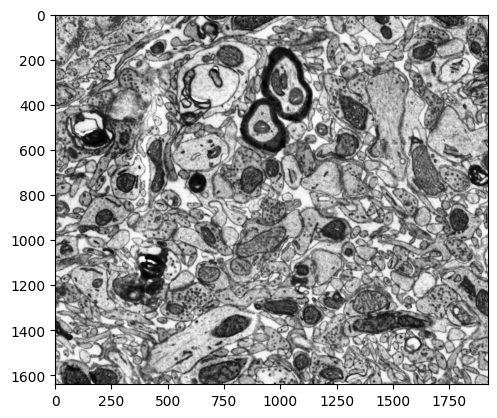

In [69]:
plt.imshow(data_to_save[regs[0]][0], cmap = 'gray')

AttributeError: AxesImage.set() got an unexpected keyword argument 'color'

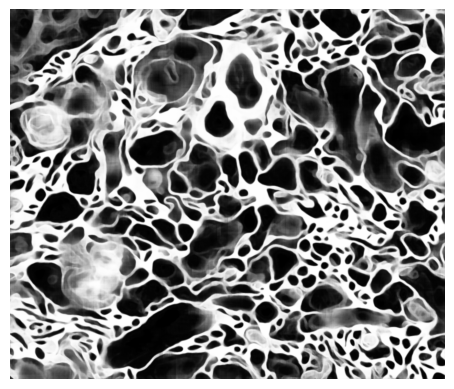

In [51]:
# fig, ax = plt.subplots(1,, figsize=(15,5))
# ax[0].imshow(mb_probs, cmap = 'gray')
# ax[0].axis('off')
# ax[1].imshow(hdt_mb_probs, cmap = 'gray')
# ax[1].axis('off')
# ax[2].imshow(emap, cmap = 'gray')
# ax[2].axis('off')

# plt.show()

# show the merge error in red and split error in yellow over mb_probs
# fig, ax = plt.subplots(1, figsize=(15,5))
fig, ax = plt.subplots()

# Display mb_probs as a grayscale image
cax = ax.imshow(mb_probs, cmap='gray')
# ax.imshow(mb_probs, cmap = 'gray')
ax.axis('off')

# Add a color bar for mb_probs
# fig.colorbar(cax)

# Overlay split_errors on the plot in red
# ax.plot(split_error, color='red', marker='o', linestyle='none', label='Split Errors')

# # Overlay merge_errors on the plot in yellow
# ax.plot(merge_error, color='yellow', marker='x', linestyle='none', label='Merge Errors')

# Add a legend
# ax.legend()


# print(np.unique(merge_error, return_counts = True))
# ax.imshow(merge_error,cmap = 'gray')
# ax.imshow(split_error, cmap = 'gray')

# ax.imshow(split_error, cmap = '', alpha=0.5)
# ax.imshow
plt.show()

In [ ]:
# plt.imshow()

In [4]:
data_path = "/storage2/projects/smartEM/em-vis/smartem-data-train.hdf5"

import h5py
import numpy as np
import matplotlib.pyplot as plt

with h5py.File(data_path, 'r') as f:
    

    
    
    lst = list(f.keys())
    print(len(lst))
    for group in f.keys():
        print(f[group].keys())
        break

230
<KeysViewHDF5 ['100', '1000', '1200', '125', '150', '200', '25', '300', '400', '50', '500', '600', '75', '800']>
